---


<center>
    <h1>Dornsife Reading Program Fall 2022
    </h1>
    <h2>
        Financial Applications for Stochastic Calculus    
    </h2>
    <h5>
        Presented by Stanley Hong (hongstan@usc.edu) and Clark Miyamoto (cmiyamot@usc.edu).
    </h5>
    <h5>
        Under mentorship from Thejani Gamage (gamage@usc.edu).
    </h5>
</center>

---



# Stanley (He/Him)

<center>
<p><img class="mb-6" src="stanley.jpg" width="400" height="400" alt="a bad repository"/></p>
    <br>
</center>

*   Sophomore
*   B.S. Applied Maths (+M.S. Applied Maths?) // minor in business finance, EALC
*   Research / Work experience: USC Math Center, grader, RA in social sciences
*   Want to become a Quant trader!
*   Hobbies: traveling, gaming, music

---

# Clark (He/Him)

<center>
<p><img class="mb-6" src="clark.jpg" width="400" height="400" alt="a bad repository"/></p>
    <br>
</center>

*   Senior
*   B.S. Physics
*   Research / Work Experience: Experimental Superconducting Qubits, Landscape Problem in String Theory
*   Hobbies: Photography, Surfing, Climbing, Quantitative Finance

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yahooFinance

In [2]:
# Load in Tesla Stock
GetTeslaInformation = yahooFinance.Ticker("TSLA")

# Get historical data, past 6 months
df_Tesla6mo = GetTeslaInformation.history(period="6mo")

In [3]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [5]:
# Generate plot data for the opening question

x0 = df_Tesla6mo['Open'][0]
n = len(df_Tesla6mo['Open'])
dt =  1
delta = 10

y_brownian = brownian(x0, n, dt, delta)

# Outline of Talk

- Introduction to Stochastic Differential Equations
- Murayama Method
- Estimating Price of European Call options

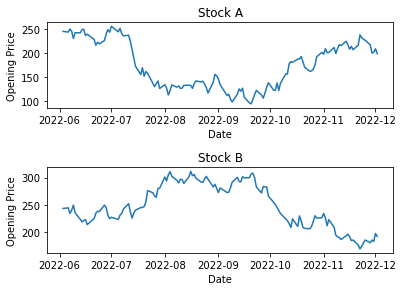

In [13]:
figure, axis = plt.subplots(2,1)

# This is the generated data
axis[0].plot(df_Tesla6mo.index, y_brownian)
axis[0].set_title('Stock A')

# This is the real data
axis[1].plot(df_Tesla6mo.index, df_Tesla6mo['Open'])
axis[1].set_title('Stock B')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.7)

axis[0].set(xlabel = 'Date', ylabel = 'Opening Price')
axis[1].set(xlabel = 'Date', ylabel = 'Opening Price')

plt.show()
figure.savefig('q_stock_ab.png')

# Question:
## Which of these two graphs is an actual stock and the other is a random walk?

<center>
<p><img class="mb-6" src="q_stock_ab.png" width="400" height="400" alt="a bad repository"/></p>
    <br>
</center>

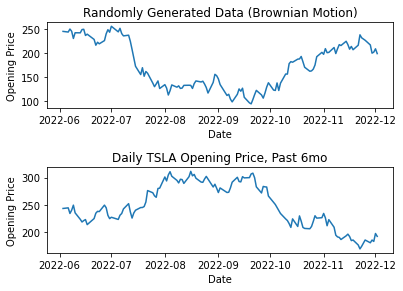

In [14]:
figure, axis = plt.subplots(2,1)

axis[0].plot(df_Tesla6mo.index, y_brownian)
axis[0].set_title('Randomly Generated Data (Brownian Motion)')

axis[1].plot(df_Tesla6mo.index, df_Tesla6mo['Open'])
axis[1].set_title('Daily TSLA Opening Price, Past 6mo')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.7)

axis[0].set(xlabel = 'Date', ylabel = 'Opening Price')
axis[1].set(xlabel = 'Date', ylabel = 'Opening Price')


plt.show()
figure.savefig('a_stock_ab.png')

# Answer:
### The top one is fake!


<center>
<p><img class="mb-6" src="a_stock_ab.png" width="400" height="400" alt="a bad repository"/></p>
    <br>
</center>

<b>Takeaway:</b> The graphs look very similar in "style". Stochastic Calculus can appproximate these systems quite well.

Stochastic Calculus is widely used in industry as well.

---

# Brief Introduction to Stochastic Calculus

---


## Why do we use it?

In life, it's often easier to talk about related rates rathern than values at every point in time. What happens if there's noise / randomness in these related rates? Need something new!

# Stochastic Differential Equations

In general, a Stochastic differential equation can be described as a sum of two terms.

$$ dP_t = \mu(t, P_t) dt + \sigma(t, P_t) dW_t $$

- $P$ is a stochastic process
  - $P_t$ is a random variable for each $t$
- $W_t$ is a Wiener process / Brownian motion
- $\mu$ is the drift. Over large time spans will the system drift up or down?
- $\sigma$ is the volatility. How big are these random fluctuations?

### Consider a "safe" investment 
There's no such thing a truly safe investment, but let's consider an asset such that your $\text{"noise"} \approx 0$. Ex: treasury bond.

$$ \dfrac{dP}{dt} = \mu P $$
- Deterministic exponential growth dependent on $\mu$
    - $P$ is a deterministic function of $t$

### Consider a risky investment
An asset where the growth rate of price is modified by non-negligable noise / randomness. I.e. TSLA stock, day trading.

$$ \dfrac{dP_t}{dt} = (\mu + \sigma \times \text{"Noise or Randomness"}) P_t \\
\implies dP_t = \mu P_t dt + \sigma P_t dW_t $$

- Now $P$ is a stochastic process
  - Where $P_t$ is a random variable for each $t$


The form of this equation is actually well studied. It's called <b>Geometric Brownian Motion</b>

# Geometric Brownian Motion
A system is GBM if and only if it has the form
$$dP_t = \mu P_t dt + \sigma P_t dW_t$$

1. It has a closed form solution!
$$P_t = P_0 \exp((\mu - \dfrac 1 2 \sigma^2) t + \sigma W_t)$$

2. The expectation value of the system is:
$$\mathbb E[P_t] = P_0 e^{\mu t}$$

In [15]:
def geometric_brownian_motion(t, mu, sigma, P_0):
    '''
    Generates data based off of Geometric Brownian Motion

        dP_t = mu * P_t * dt + sigma * P_t * dW_t

    Which has the closed form solution

        P_t = P_0 * exp[(mu - 0.5 * sigma^2) * t + sigma * W_t]

    -------------------------------
    Inputs:
    - t (numpy.Array of float), array of times to generate on. In units of years.
    - mu (float), expected return w/ continous compoudning
    - sigma (float), volatility
    - P_0 (float) initial stock price
  
    Returns:
    - P_t (numpy.Array of float), resulting stock price generated by Geometric Brownian Motion
    '''
    dt = t[1] - t[0]
    P = [P_0]
    
    for i in t[1:]:
        epsilon = np.random.normal(0,1,size=1)[0]
        dP = mu * P[-1] * dt + sigma * epsilon * np.sqrt(dt)
        P.append(P[-1] + dP)
        
    return P

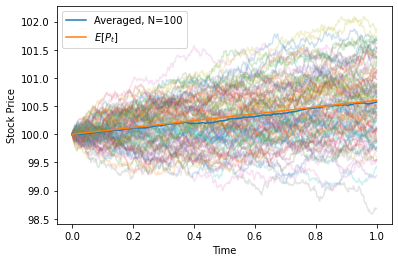

In [22]:
### Initalize Simulation
# Conditions for simulation
P0 = 100
mu = 0.006
sigma = 0.7
num_points = 500

# Post simulation averaging
num_averaging = 100



##### Let's graph stuff
t = np.linspace(0,1,num_points)
figure, axis = plt.subplots(1)

data_cont = []
# Generated data, Monte Carlo Simulation
for _ in range(num_averaging):
    output = geometric_brownian_motion(t, mu, sigma, P0)
    data_cont.append(np.array(output))
    axis.plot(t,output, alpha=0.2, label='_nolegend_')

# Averaging generated data
avg_data = np.zeros(num_points)
for i in range(num_averaging):
    avg_data = np.add(data_cont[i], avg_data)
avg_data = avg_data / num_averaging
axis.plot(t, avg_data, label=f'Averaged, N={num_averaging}')

# Expectation value curve
expect_output = P0 * np.exp(mu * t)
axis.plot(t, expect_output, label=r'$E [P_t]$')

axis.set_xlabel('Time')
axis.set_ylabel('Stock Price')
axis.legend()
plt.show()

figure.savefig('GBM.png')

### Plotting this out, shows our results hold true!

<center>
<p><img class="mb-6" src="GBM.png" width="700" height="700" alt="a bad repository"/></p>
    <br>
</center>

---
# Euler-Maruyama Method

For approximating Stochastic Differential Equations.

---

This is the Stochastic version of the Euler method. We used this to approximate the data that comes out of a stochastic system.

It works for any stochastic system!
$$ dX_t = \mu(X_t) dt + \sigma (X_t) dW_t $$

### Resulting Approximation
$$ X_{t + \Delta t} \approx \mu (X_t) \Delta t + \sigma(X_t) \sqrt{\Delta t} Z $$
Where $Z$ is a normal distribution centered at 0 with a variance of 1.




```
  # Code for Euler-Maruyama Method using Matlab code
  dt = 2^(-10);
	T = 2;
	N = T / dt;
	mu = 0.16; % Random mu
	sig = 0.3; % Random sigma
	
	M = 10;
	m = 1;
	FA = zeros(1,M); % Analytical solution
	FAEM = zeros(1,M); % Euler method approximation
	while m<M+1
	X = zeros(1,N+1);
	X(1) = 100; % This needs to be specified to 'reset' the initial value to 100
	dw1 = sqrt(dt)*normrnd(0,1,1,N);
	W = sum(sw1);
	a=(mu-sig^2/2)*T + sig*W;
	FA(m) = x*exp(a)
	for j=1:N
	x = x + mu*x*dt + sig*x*dw1(j);
	X(j+1)=x; % X(1)=X0, X(2)=XDeltat, ...
	end
	FAEM(m) = X(N+1);
	m = m + 1;
	end
	
	mean(FA)
	mean(FAEM)
	
	plot(X)```



---


# European Call Option Pricing


---

Formula for payoff of a European Call Option:
$$ P(t) - K = \begin{cases}
P(t) - K, & P(t) > K\\
0, & P(t) < K
\end{cases}$$

In [25]:
def EC(P,K):
  '''
  Evalulates teh European Call Option for one point in time

  Inputs:
  - P (float), current price
  - K (float), strike price

  Return:
  - European Call Option
  '''
  if P > K:
    return P - K
  else:
    return 0

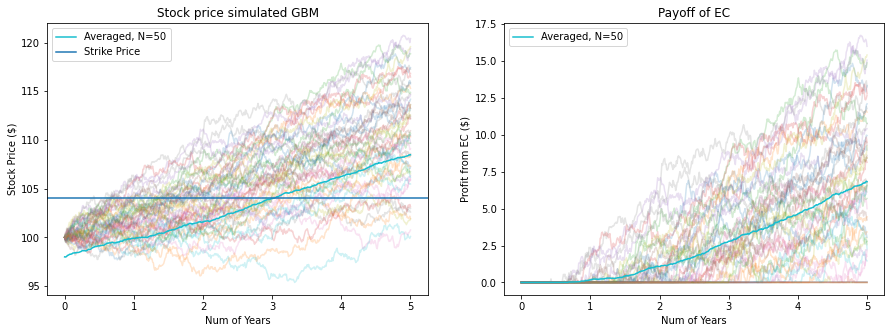

Your expected earning from an European Call is $6.99


In [65]:
# Initalize System
S0= 100
T=5
r=0.02 #
sigma=0.02 #volatility
K=104 #dollars
dt=0.01
N=T/dt

list_of_S = []
list_of_EC_Pricing = []
ER=[]
# Graph stuff!

figure, axis = plt.subplots(ncols=2, figsize=(15, 5))

m=1
t = np.linspace(0,T, int(N))
averaging = 50
while (m < averaging):
    S = [S0]
    EC_Pricing = [0]
    for j in range(int(N)-1):
        dw = sqrt(dt) * np.random.normal(0,1,size=1)[0]
        EC_Pricing.append(EC(S[j],K))
        S.append(S[j]+r*S[j]*dt+sigma*S[j]*dw) # Geometric Brownian Motion
    
    # Plot everything
    axis[0].plot(t, S, alpha = 0.2)
    axis[1].plot(t, EC_Pricing, alpha = 0.2)
    
    # Save data
    list_of_S.append(np.array(S))
    list_of_EC_Pricing.append(np.array(EC_Pricing))
    ER.append(max(S[-1]-K,0))
    m += 1
    
# Averaging generated data
avg_S = np.zeros(int(N))
for i in list_of_S:
    avg_S= np.add(i, avg_S)
avg_S = avg_S / averaging
axis[0].plot(t, avg_S, label=f'Averaged, N={averaging}')

avg_EC = np.zeros(int(N))
for i in list_of_EC_Pricing:
    avg_EC= np.add(i, avg_EC)
avg_EC = avg_EC / averaging
axis[1].plot(t, avg_EC, label=f'Averaged, N={averaging}')


# Graphing set up
axis[0].axhline(K, label='Strike Price')
axis[0].set_title(f'Stock price simulated GBM')
axis[0].set_xlabel('Num of Years')
axis[0].set_ylabel('Stock Price ($)')
axis[0].legend()

axis[1].set_title(f'Payoff of EC')
axis[1].set_xlabel('Num of Years')
axis[1].set_ylabel('Profit from EC ($)')
axis[1].legend()

plt.show()
figure.savefig('ECO.png')

earnings = np.exp(-r*T) * np.mean(ER)
print(f'Your expected earning from an European Call is ${np.mean(ER):0.3}')

### Plotting this out, shows our results hold true!

<center>
<p><img class="mb-6" src="ECO.png" width="2000" height="2000" alt="a bad repository"/></p>
    <br>
</center>



```
# Code for Geometric Brownian motion European Call Option in Matlab langauge

%S_t = r*s_t*dt+ sigma*S_t*dW_t;
S0= 100;
T=5;
r=0.02;
sigma=0.02;
K=104;

dt=0.01;
N=T/dt;
ER=zeros(1,50);
m=1;
while m<51
dw = sqrt(dt)*normrnd(0,1,1,N); 
S=S0;
for j=1:N
S=S+r*S*dt+sigma*S*dw(j);
end
ER(m)= max(S-K,0);
m=m+1;
end
exp(-r*T)*mean(ER)```



# Concluding Remarks

## Takeaways
- We've scratched the surface of Stochastic Calculus (we know it exists and it works!)
- We can apply the Euler-Maruyama method to non-explicitly solvable Stochastic PDEs

## Next Steps?!
- Learn more theory of Stochastic Calculus and SDE (MATH 530ab, MATH 509, ...)

# Thank you! 